In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [2]:
schools = pd.read_csv("neighborhood_enrollment.csv")

In [3]:
drop = schools.dropna(subset = "total_students_enrolled")

In [4]:
students = drop[["neighborhood", "total_students_enrolled", "grade_level"]]
students.head(10)

,neighborhood,total_students_enrolled,grade_level
6,Bedford Dwellings,12.0,Pre-K
7,Beechview,44.0,Pre-K
9,Bloomfield,21.0,Pre-K
12,Brighton Heights,32.0,Pre-K
13,Brookline,57.0,Pre-K
15,Carrick,64.0,Pre-K
17,Central Northside,16.0,Pre-K
21,Crafton Heights,36.0,Pre-K
22,Crawford-Roberts,17.0,Pre-K
26,East Hills,44.0,Pre-K


In [5]:
high = students.sort_values("total_students_enrolled", ascending=False)

In [6]:
high.groupby("grade_level").head().sort_values(["grade_level", "total_students_enrolled"],ascending=False)

,neighborhood,total_students_enrolled,grade_level
15,Carrick,64.0,Pre-K
70,Sheraden,58.0,Pre-K
13,Brookline,57.0,Pre-K
41,Homewood South,46.0,Pre-K
7,Beechview,44.0,Pre-K
107,Carrick,541.0,K-5
105,Brookline,526.0,K-5
99,Beechview,339.0,K-5
104,Brighton Heights,296.0,K-5
168,Squirrel Hill South,286.0,K-5


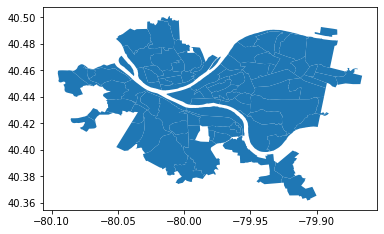

In [7]:
neighborhoods = geopandas.read_file("../Neighborhood-Shapefile/Neighborhoods_.shx")
neighborhoods.plot()

In [8]:
students_bar=students.pivot(index="neighborhood", columns="grade_level", values="total_students_enrolled")
students_bar

grade_level,6-8,9-12,K-5,Pre-K
neighborhood,,,,
Allegheny Center,23.0,18.0,39.0,NaN
Allentown,84.0,67.0,133.0,NaN
Arlington,49.0,60.0,74.0,NaN
Arlington Heights,NaN,NaN,21.0,NaN
Banksville,39.0,43.0,88.0,NaN
...,...,...,...,...
West End,NaN,NaN,17.0,NaN
West Oakland,11.0,14.0,26.0,NaN
Westwood,55.0,62.0,126.0,26.0


In [9]:
# students_bar.sort_values("total_students_enrolled")
students_bar["total"] = 0
students_bar["total"] = students_bar.sum(axis=1)
students_bar

grade_level,6-8,9-12,K-5,Pre-K,total
neighborhood,,,,,
Allegheny Center,23.0,18.0,39.0,NaN,80.0
Allentown,84.0,67.0,133.0,NaN,284.0
Arlington,49.0,60.0,74.0,NaN,183.0
Arlington Heights,NaN,NaN,21.0,NaN,21.0
Banksville,39.0,43.0,88.0,NaN,170.0
...,...,...,...,...,...
West End,NaN,NaN,17.0,NaN,17.0
West Oakland,11.0,14.0,26.0,NaN,51.0
Westwood,55.0,62.0,126.0,26.0,269.0


In [10]:
sort_enroll = students_bar.sort_values("total")
sort_enroll.tail()

grade_level,6-8,9-12,K-5,Pre-K,total
neighborhood,,,,,
Squirrel Hill South,115.0,249.0,286.0,29.0,679.0
Sheraden,156.0,205.0,275.0,58.0,694.0
Beechview,196.0,215.0,339.0,44.0,794.0
Brookline,276.0,310.0,526.0,57.0,1169.0
Carrick,293.0,378.0,541.0,64.0,1276.0


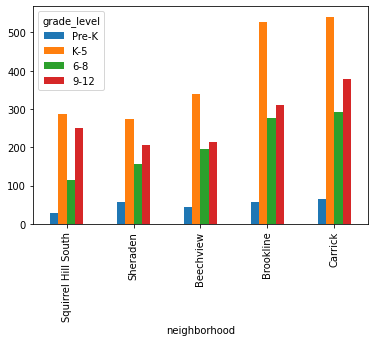

In [11]:
sort_enroll[["Pre-K", "K-5", "6-8", "9-12"]].tail().plot(kind="bar")

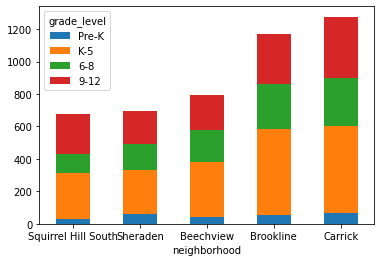

In [12]:
sort_enroll[["Pre-K", "K-5", "6-8", "9-12"]].tail().plot.bar(stacked=True, rot=0)